In [65]:
import pandas as pd
#from sklearn.preprocessing import 

df=pd.read_csv("Daily activity metrics.csv")
df.head()

,Date,Move Minutes count,Calories (kcal),Distance (m),Heart Points,Heart Minutes,Average speed (m/s),Max speed (m/s),Min speed (m/s),Step count,Average weight (kg),Max weight (kg),Min weight (kg),Cycling duration (ms),Walking duration (ms),Running duration (ms),Calisthenics duration (ms)
0,03-08-2022,67.0,617.878588,3413.194972,18.0,18.0,0.565501,1.459932,0.298564,5364,52.0,52.0,52.0,NaN,3889928.0,NaN,NaN
1,04-08-2022,41.0,1394.882813,1699.767803,NaN,NaN,0.402249,1.160393,0.257383,3125,NaN,NaN,NaN,NaN,1343690.0,NaN,NaN
2,05-08-2022,6.0,1351.692386,234.169271,NaN,NaN,0.373200,0.872139,0.288269,616,NaN,NaN,NaN,NaN,246274.0,NaN,NaN
3,06-08-2022,3.0,1347.269729,126.632257,NaN,NaN,0.341263,0.428228,0.267678,506,NaN,NaN,NaN,NaN,133899.0,NaN,NaN
4,07-08-2022,42.0,1429.756733,2211.826682,12.0,12.0,0.426071,1.210147,0.257383,3610,NaN,NaN,NaN,NaN,1990308.0,101564.0,NaN


In [66]:
df1=df[['Date','Calories (kcal)','Step count','Heart Points']]
df1.head()

,Date,Calories (kcal),Step count,Heart Points
0,03-08-2022,617.878588,5364,18.0
1,04-08-2022,1394.882813,3125,NaN
2,05-08-2022,1351.692386,616,NaN
3,06-08-2022,1347.269729,506,NaN
4,07-08-2022,1429.756733,3610,12.0


In [67]:
df1.fillna(0, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_11132\960945435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.fillna(0, inplace=True)


In [68]:
df1.isna().sum()

Date               0
Calories (kcal)    0
Step count         0
Heart Points       0
dtype: int64

In [69]:
df1.describe()

,Calories (kcal),Step count,Heart Points
count,450.000000,450.000000,450.000000
mean,1444.428047,5242.166667,13.864444
std,122.325767,3753.861811,14.411602
min,617.878588,11.000000,0.000000
25%,1341.999868,2010.750000,0.000000
50%,1439.960397,4909.000000,11.000000
75%,1517.775857,7737.250000,22.000000
max,1858.123257,18782.000000,72.000000


In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             450 non-null    object 
 1   Calories (kcal)  450 non-null    float64
 2   Step count       450 non-null    int64  
 3   Heart Points     450 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 14.2+ KB


In [71]:
df1.dtypes

Date                object
Calories (kcal)    float64
Step count           int64
Heart Points       float64
dtype: object

In [72]:
from sklearn.preprocessing import MinMaxScaler
numeric_columns = df1.select_dtypes(include='number')
scaler = MinMaxScaler()
n_df1 = scaler.fit_transform(numeric_columns)
n_df1 = pd.DataFrame(n_df1, columns=numeric_columns.columns)

In [73]:
n_df1.head()

,Calories (kcal),Step count,Heart Points
0,0.000000,0.285174,0.250000
1,0.626493,0.165894,0.000000
2,0.591669,0.032231,0.000000
3,0.588103,0.026370,0.000000
4,0.654611,0.191732,0.166667


In [74]:
#n_df1['date']=df1['Date'].str.replace("-","").astype(int)
#n_df1.drop('date', axis=1)

In [75]:
n_df1.head()

,Calories (kcal),Step count,Heart Points
0,0.000000,0.285174,0.250000
1,0.626493,0.165894,0.000000
2,0.591669,0.032231,0.000000
3,0.588103,0.026370,0.000000
4,0.654611,0.191732,0.166667


# Training and testing

In [78]:
from sklearn.model_selection import train_test_split

X=n_df1[['Calories (kcal)', 'Step count']]
y=n_df1[['Heart Points']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [79]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [80]:
y_pred=model.predict(X_test)
#y_predd=pd.DataFrame(y_pred)
#y_predd

In [81]:
y_test

,Heart Points
407,0.263889
444,0.000000
117,0.291667
30,0.263889
415,0.375000
...,...
29,0.208333
298,0.111111
285,0.902778
26,0.833333


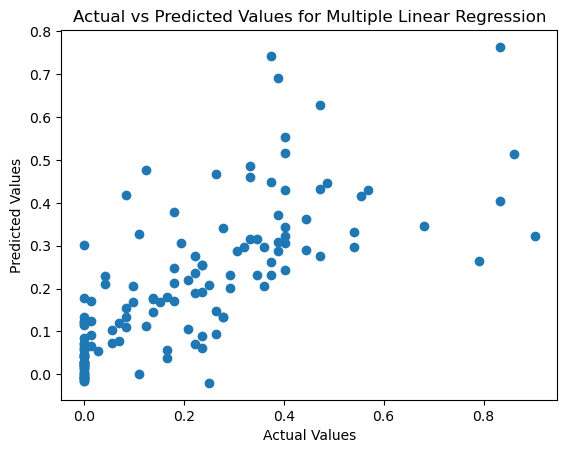

In [82]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
#plt.plot(X_train, model.predict(X_train))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Multiple Linear Regression')
plt.show()

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2 Score):", r2)

Mean Absolute Error: 0.09949459025181256
Mean Squared Error: 0.020711791764492046
Root Mean Squared Error: 0.14391591907948212
R-squared (R2 Score): 0.5398100493433776


# Lasso-ridge

In [90]:
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [91]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

Lasso()

In [92]:
y_pred_l = lasso_model.predict(X_test)

In [97]:
mae_l = mean_absolute_error(y_test, y_pred_l)
mse_l = mean_squared_error(y_test, y_pred_l)
r2_l = r2_score(y_test, y_pred_l)
rmse_l = mean_squared_error(y_test, y_pred_l, squared=False)  

print("Mean Absolute Error:", mae_l)
print("Mean Squared Error:", mse_l)
print("Root Mean Squared Error:", rmse_l)
#print("R-squared (R2 Score):", r2_l)

Mean Absolute Error: 0.17087824155725387
Mean Squared Error: 0.04523310867556899
Root Mean Squared Error: 0.21268076705609512


In [94]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [95]:
y_pred_r = ridge_model.predict(X_test)

In [96]:
mae_r = mean_absolute_error(y_test, y_pred_r)
mse_r = mean_squared_error(y_test, y_pred_r)
r2_r = r2_score(y_test, y_pred_r)
rmse_r = mean_squared_error(y_test, y_pred_r, squared=False)  

print("Mean Absolute Error:", mae_r)
print("Mean Squared Error:", mse_r)
print("Root Mean Squared Error:", rmse_r)
print("R-squared (R2 Score):", r2_r)

Mean Absolute Error: 0.10095164101127557
Mean Squared Error: 0.020495117318744902
Root Mean Squared Error: 0.14316115855477315
R-squared (R2 Score): 0.5446242828790716
